---

# Principal Component Analysis

## Introduction

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

<p>
    <img src="PCA.jpeg" width="500" align="center">
</p>

To sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible.

## Algorithm

1. **Stadardize (center and scale) the data.** 

To center the data, we average each row by replacing the value $x$ by 
$$
x - \text{mean}
$$
Data values may have vastly different ranges, and so, to ensure that PCA is not selecting wrong directions in describing data variation, we also divide by the standard deviation. That is, we scale the data in each variable by finding the *$z$-scores*:

$$
z = \frac{x - \text{mean}}{\text{standard devation}}
$$

Finally, we form the $m\times n$ matrix $A$. 

2. **Compute the covariance or correlation matrix**:

$$
S = \frac{1}{n-1}AA^T
$$

If we are working with only centered data, the above matrix is the covariance matrix, and if we are working with scaled data, then $S$ is the correlation matrix. The entries on the diagonal are the variances (or correlations) for each variable and the off-diagonal entries are the covariances (or correlations) between two variables: positive covariance indicates that the variables are directly related (when one increases, the other increases as well), negative covariance indicates inverse relationship (when one increases, the other decreases). This matrix is symmetric of size $m \times m$, so its columns are of the same size as the columns of $A$.

3. **Find the eigenvalues and the orthonormal eigenvectors of $S$.** 

These eigenvectors are columns of the matrix $U$ in the singular value decomposition of $A$, up to the factor $n-1$. Further, we denote the eigenvalues by $\sigma_{i}^{2}$. This is equivalent to the **Singular Value Decomposition** of our shifted training set matrix $A$,

$$
A = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^{T}, 
$$

4. **Find the principal components.**

We arrange the eigenvalues found in the previous step in the decreasing order. The first principal component $PC_1$ is in the direction of the 1st eigenvector, the second principal component $PC_2$ is in the direction of the 2nd eigenvector, etc. The entries of each $PC_i$ are called *loading scores* and they tell us how the $PC_i$ is a linear combination of features.

5. **Reduce the dimension of the data.**

We project data points (i.e., columns of $A$) onto the selected principal components (i.e., several eigenvectors of $S$). By the Eckart-Young theorem we know that the line closest to the data points is in the direction of $PC_1$, etc (”closest” is in the sense of perpendicular least squares).

In addition, the total variance, which is the trace of $S$, is

$$
T = \text{trace}(S) = \frac{\sigma_{1}^{2} + \dots + \sigma_{m}^{2}}{n-1},
$$

and the $i$-th principle component $PC_i$ explains

$$
\frac{\sigma_{i}^{2}/(n-1)}{T} = \frac{\sigma_{i}^{2}}{\sigma_{1}^{2} + \dots + \sigma_{m}^{2}}
$$

of the total variation. We use a scree plot to graph the percentages of variation that each $PC_i$ accounts for. Also, the sum of squared distances from the points projected to $PC_i$ to the origin is the eigenvalue for $PC_i$ or the squared singular value $\sigma_{i}^{2}$.

---

## Implement

First, we load and visualize the data.

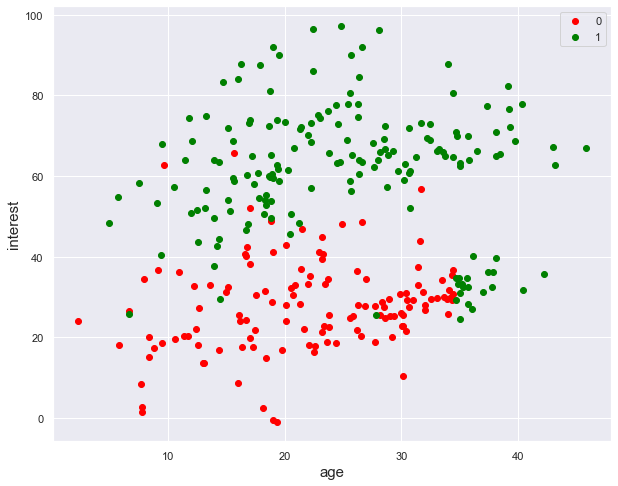

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme 
sns.set_theme()

# Import the data
df = pd.read_csv("classification.csv")
X = df[["age", "interest"]].to_numpy()
y = df["success"].to_numpy()
y = y.astype(int)

# create a plot 
results = [0.0, 1.0]
colors = ["red", "green"]
fig, ax = plt.subplots(figsize = (10, 8))
for results, colors in zip(results, colors):
    temp_df = df[df.success == results]
    ax.scatter(temp_df.age,
               temp_df.interest,
               c = colors,
               label = int(results), 
               )
    
ax.set_xlabel("age", fontsize = 15)
ax.set_ylabel("interest", fontsize = 15)
ax.legend()
plt.show()

Next, we will implement the first three steps of algorithm. i.e. stadardize the data, compute the covariance or correlation matrix and find the eigenvalues and the orthonormal eigenvectors of **S**.

In [59]:
A = X - X.mean(axis = 0)

U, sigma, Vt = np.linalg.svd(A, full_matrices=False)

print(f"np.shape(U) = {np.shape(U)}")
print(f"np.shape(sigma) = {np.shape(sigma)}")
print(f"np.shape(Vt) = {np.shape(Vt)} \n")

np.shape(U) = (297, 2)
np.shape(sigma) = (2,)
np.shape(Vt) = (2, 2) 



In [60]:
sigma_mat = np.diag(sigma)
print(f"A == U * sigma_mat * Vt: {np.allclose(A, np.dot(U, np.dot(sigma_mat, Vt)))} \n")

A == U * sigma_mat * Vt: True 



Compute $A [PC_1 PC_2]$.

In [61]:
PC1 = Vt.T[:, 0]
PC2 = Vt.T[:, 1]

W2 = Vt.T
X2D = A.dot(W2)

Create the Principle Complonent plot.

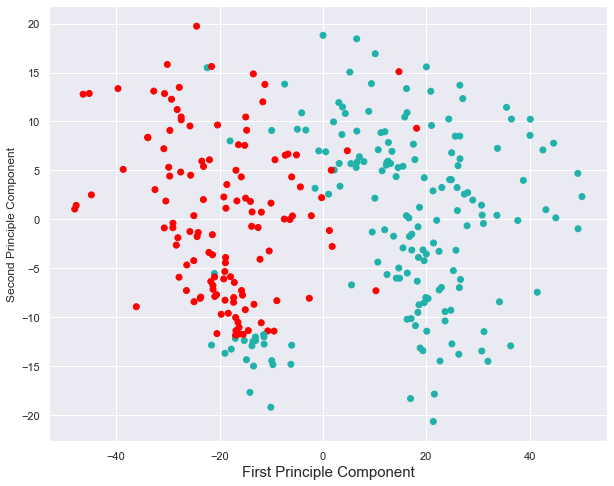

In [62]:
def colors(y):
    if y == 0:
        return "red"
    elif y == 1:
        return "lightseagreen"

c = [colors(label) for label in y]
plt.figure(figsize = (10, 8))
plt.scatter(X2D[:, 0], X2D[:, 1], c = c)
plt.xlabel("First Principle Component", fontsize = 15)
plt.ylabel("Second Principle Component")
plt.show()

This plot does not look good. 

For fail cases (lable "0", red color points), the most value of the first principle component is negative, while for success cases (lable "1", lightseagreen color points), the most value is positive. 

Next, we calculate the explained variance ratio and variation.

In [63]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_X = preprocessing.scale(X)
pca = PCA()
pca.fit(scaled_X)

print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}")

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")

pca.explained_variance_ratio_ = [0.57143807 0.42856193]
per_var = [57.14 42.86] 



We can also create a bar chart to visualize the per variation.

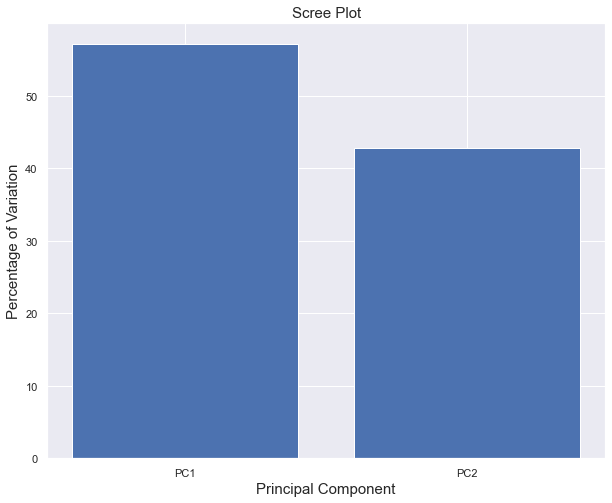

In [64]:
# This chart is called a "Scree Plot"

labels = [f"PC{i}" for i in range(1,3)]

plt.figure(figsize = (10, 8))
plt.bar(x = range(1, 3), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.show()

Now, we call function pca.components_ to see how each PC is obtained

In [65]:
features = list(set(df.columns) - {"success"})

pd.DataFrame(data = pca.components_, columns = labels, index = features)

,PC1,PC2
age,-0.707107,-0.707107
interest,-0.707107,0.707107


From the generated table above, we can obtain this linear equation:
$$ PC1 = -0.707107*age - 0.707107 * interest$$
$$ PC2 = -0.707107*age + 0.707107 * interest$$

Next, we use pca.transform to see how our data looks like in the new coordinate system adding success labels and label colors.

In [66]:
pca_data = pca.transform(scaled_X)
pca_df = pd.DataFrame(pca_data, columns = labels)
# we add to the previous table the labels 
projected_df = pd.concat([pca_df, df.success], axis = 1)
# we add to the previous table the labels colors
projected_df["color"] = c
projected_df

,PC1,PC2,success,color
0,0.911494,-0.903197,0.0,red
1,1.026853,-0.845305,0.0,red
2,-0.141402,-1.271955,0.0,red
3,2.044302,0.671225,1.0,lightseagreen
4,1.718500,-0.230974,0.0,red
...,...,...,...,...
292,0.590669,-1.227932,0.0,red
293,-0.123020,1.490838,1.0,lightseagreen
294,-0.577015,0.808002,1.0,lightseagreen
295,-1.548633,1.234165,1.0,lightseagreen


Plot our data in the first two coordinates PC1, PC2.

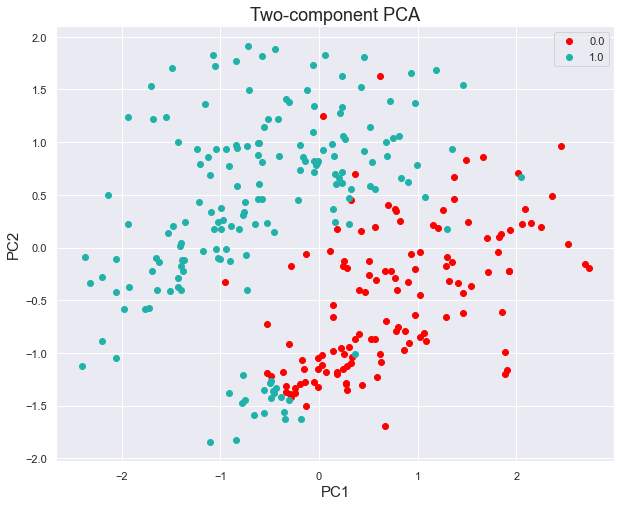

In [67]:
targets = [0.0, 1.0]
colors = ["red", "lightseagreen"]

plt.figure(figsize = (10, 8))

for target, color in zip(targets, colors):
    temp_df = projected_df[projected_df['success'] == target]
    plt.scatter(temp_df["PC1"],
                temp_df["PC2"],
                c = color)
    
plt.xlabel('PC1', fontsize = 15)
plt.ylabel('PC2', fontsize = 15)
plt.title('Two-component PCA', fontsize = 18)
plt.legend(targets)
plt.show()

Emmm... This plot looks really bad! Maybe this method is not suitable for this dataset.

---

## Example of the breast cancer data

In the following, we will use breast cancer data from sklearn package to do PAC.

Keys of the data.

In [69]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer(as_frame = True)
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Classification of the variable "features".

In [70]:
features = cancer["feature_names"]
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Classification of the variable "targets_names".

In [71]:
targets = cancer["target_names"]
targets

array(['malignant', 'benign'], dtype='<U9')

Classification of the variable "frame".

In [72]:
cancer_df = cancer["frame"]
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [73]:
X = cancer_df[features].to_numpy()
scaled_X = preprocessing.scale(X)
scaled_X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

Perform PCA and get 30 new coordinates that we call principal components (PCs).

In [74]:
pca = PCA()   
pca.fit(scaled_X)
print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}")

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")

pca.explained_variance_ratio_ = [4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]
per_var = [4.427e+01 1.897e+01 9.390e+00 6.600e+00 5.500e+00 4.020e+00 2.250e+00
 1.590e+00 1.390e+00 1.170e+00 9.800e-01 8.700e-01 8.000e-01 5.200e-01
 3.100e-01 2.700e-01 2.000e-01 1.800e-01 1.600e-01 1.000e-01 1.000e-01
 9.000e-02 8.000e-02 6.000e-02 5.000e-02 3.000e-02 2.000e-02 1.000e-02
 0.000e+00 0.000e+00] 



Create the bar chart of PCs.

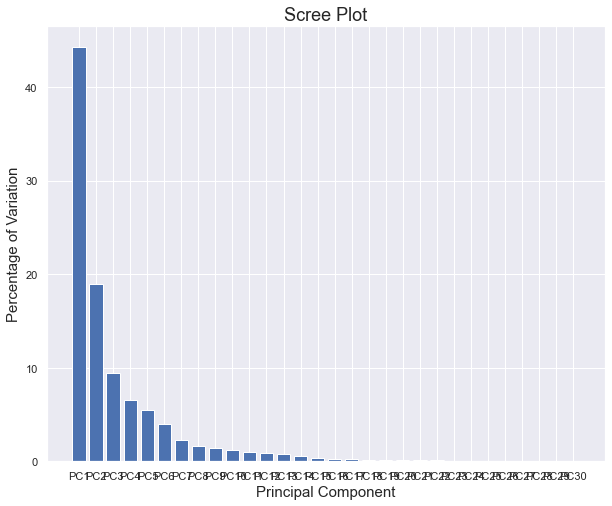

In [75]:
labels = [f"PC{i}" for i in range(1,31)]

plt.figure(figsize = (10, 8))
plt.bar(x = range(1, 31), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 18)
plt.show()

Shows how each PC can be obtained using the original coordinates

In [76]:
labels = [f"PC{i}" for i in range(1, 31)]

pd.DataFrame(pca.components_, columns = labels, index = cancer['feature_names'])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
mean radius,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
mean texture,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
mean perimeter,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791
mean area,0.041409,-0.603050,0.041983,0.053434,0.159383,0.031795,0.019123,0.065336,0.067125,0.048587,...,0.015417,-0.632808,0.013803,0.025895,0.017652,-0.091328,-0.073951,0.006007,-0.036251,-0.077053
mean smoothness,0.037786,-0.049469,0.037375,0.010331,-0.365089,0.011704,0.086375,-0.043861,-0.305941,-0.044424,...,-0.004407,-0.092883,0.007454,-0.027391,-0.324435,0.121804,0.188519,0.043332,-0.244559,0.094423
mean compactness,0.018741,-0.032179,0.017308,-0.001888,-0.286374,-0.014131,-0.009344,-0.052050,0.356458,-0.119431,...,-0.000291,-0.050008,0.008501,-0.025164,-0.369255,0.047706,0.028379,-0.030873,0.498927,-0.080224
mean concavity,-0.124088,0.011400,-0.114477,-0.051653,-0.140669,0.030918,-0.107520,-0.150482,-0.093891,0.295760,...,-0.009710,0.009871,-0.000446,0.067832,-0.108831,0.140473,-0.060488,-0.167967,-0.018491,0.374658
mean concave points,-0.007452,0.130675,-0.018687,0.034674,-0.288975,-0.151396,-0.072827,-0.152322,-0.231531,-0.177121,...,0.042619,0.036252,0.030559,0.079394,0.205852,0.084020,0.072468,-0.036171,0.228225,0.048361
mean symmetry,-0.223110,0.112699,-0.223739,-0.195586,0.006425,-0.167841,0.040591,-0.111971,0.256040,-0.123741,...,-0.112141,0.103341,-0.109614,-0.080732,0.112316,-0.100678,0.161909,0.060488,0.064638,-0.134174
mean fractal dimension,0.095486,0.240934,0.086386,0.074956,-0.069293,0.012936,-0.135602,0.008055,0.572069,0.081103,...,0.077362,0.029551,0.050508,0.069921,-0.128305,-0.172134,-0.311639,-0.076648,-0.029563,0.012610


There are linear equations for each PC, like PC1 = 0.219 * mean radius - 0.234 * mean texture ......

Next, we transform the former pca matrix.

In [80]:
pca_data = pca.transform(scaled_X)
pca_df = pd.DataFrame(pca_data, columns = labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,...,0.006888,-0.067000,0.088590,0.107898,0.219520,-0.122900,0.159198,0.009853,0.007119,-0.001415
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,...,-0.009802,0.019563,-0.055405,0.086135,0.001197,0.065889,-0.068512,-0.023575,-0.027486,-0.010419
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,...,-0.036592,0.063352,-0.200312,-0.044819,0.002429,0.007095,-0.023691,-0.002578,0.006706,0.003770
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,...,0.140648,-0.042478,0.168820,-0.195969,0.377830,-0.198192,-0.027409,-0.068086,-0.084163,-0.023783


Last, we create the two component PCA plot with PC1 and PC2.

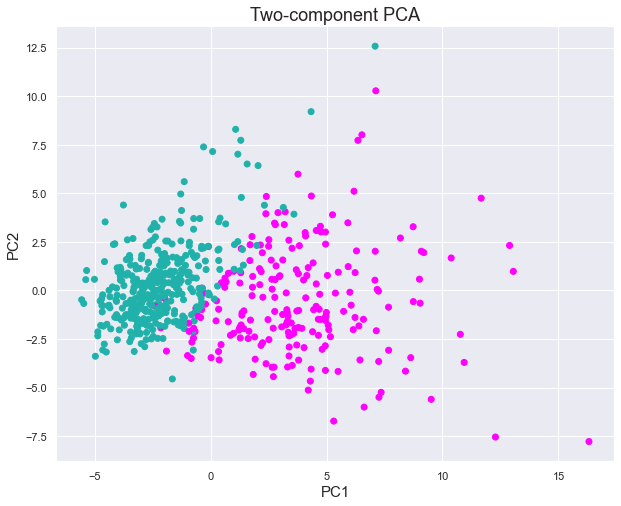

In [81]:
def color(label):
    if label == 0:
        return "magenta"
    else:
        return "lightseagreen"

colors = [color(label) for label in cancer_df["target"]]

plt.figure(figsize = (10, 8))
plt.scatter(pca_df.PC1, pca_df.PC2, c = colors)
plt.xlabel("PC1", fontsize = 15)
plt.ylabel("PC2", fontsize = 15)
plt.title("Two-component PCA", fontsize = 18)
plt.show()